# GSM-EPD-LIKH

In [1]:
%matplotlib widget
import matplotlib.pylab as plt
import sympy as sp
import numpy as np
from IPython.display import display, Math, Markdown


from bmcs_matmod.api import (
    GSMModel, GSM1D_EPD, TimeFnMonotonicAscending
)

gsm = GSMModel(GSM1D_EPD)

display(Markdown(GSM1D_EPD.latex_potentials()))

## class GSM1D_EPD
### Helmholtz free energy
$$F = - \frac{E \left(\omega - 1\right) \left(\varepsilon - \varepsilon^\mathrm{p}\right)^{2}}{2} + \frac{K z^{2}}{2} + \frac{\alpha^{2} \gamma}{2}$$
$$\left\{ X : \alpha \gamma, \  Y : \frac{E \left(\varepsilon - \varepsilon^\mathrm{p}\right)^{2}}{2}, \  Z : K z, \  \sigma^\mathrm{p} : - E \left(\omega - 1\right) \left(\varepsilon - \varepsilon^\mathrm{p}\right)\right\}$$
#### Mechanical dissipation
$$\gamma_{\mathrm{mech}} = - X \dot{\alpha} + Y \dot{\omega} - Z \dot{z} + \sigma^\mathrm{p} \dot{\varepsilon^\mathrm{p}}$$
#### Lagrangian
$$\mathcal{L} = X \dot{\alpha} - Y \dot{\omega} + Z \dot{z} - \sigma^\mathrm{p} \dot{\varepsilon^\mathrm{p}} - \lambda_{\mathrm{\phi}} \left(- \frac{S \left(\frac{Y}{S}\right)^{r + 1} \left(1 - \omega\right)^{c}}{r + 1} + Z + f_\mathrm{c} - \sqrt{\left(- X + \frac{\sigma^\mathrm{p}}{1 - \omega}\right)^{2}}\right)$$
#### Residuum
$$\frac{\partial \mathcal{L}}{\partial \mathcal{S}} = \left[\begin{matrix}- \dot{\varepsilon^\mathrm{p}} + \frac{\lambda_{\mathrm{\phi}} \sqrt{\left(- X + \frac{\sigma^\mathrm{p}}{1 - \omega}\right)^{2}}}{\left(1 - \omega\right) \left(- X + \frac{\sigma^\mathrm{p}}{1 - \omega}\right)}\\\frac{S \lambda_{\mathrm{\phi}} \left(\frac{Y}{S}\right)^{r + 1} \left(1 - \omega\right)^{c}}{Y} - \dot{\omega}\\\dot{z} - \lambda_{\mathrm{\phi}}\\\dot{\alpha} + \frac{\lambda_{\mathrm{\phi}} \left(X - \frac{\sigma^\mathrm{p}}{1 - \omega}\right) \sqrt{\left(- X + \frac{\sigma^\mathrm{p}}{1 - \omega}\right)^{2}}}{\left(- X + \frac{\sigma^\mathrm{p}}{1 - \omega}\right)^{2}}\\- Z - f_\mathrm{c} + \sqrt{\left(- X + \frac{\sigma^\mathrm{p}}{1 - \omega}\right)^{2}}\end{matrix}\right] = 0$$
### Legendre transform
#### Strain substitutions in dissipative terms
$$\left\{ \varepsilon : \frac{E \omega \varepsilon^\mathrm{p} - E \varepsilon^\mathrm{p} - \sigma}{E \left(\omega - 1\right)}\right\}$$
$$\left\{ \dot{\varepsilon} : \frac{E \omega^{2} \dot{\varepsilon^\mathrm{p}} - 2 E \omega \dot{\varepsilon^\mathrm{p}} + E \dot{\varepsilon^\mathrm{p}} - \omega \dot{\sigma} + \sigma \dot{\omega} + \dot{\sigma}}{E \left(\omega^{2} - 2 \omega + 1\right)}\right\}$$
### Gibbs free energy
$$G = \sigma \varepsilon- \left[- \frac{E \left(\omega - 1\right) \left(\varepsilon - \varepsilon^\mathrm{p}\right)^{2}}{2} + \frac{K z^{2}}{2} + \frac{\alpha^{2} \gamma}{2}\right] $$
#### Gibbs free energy after strain substitutions
$$G = \frac{- E \left(\omega - 1\right) \left(K z^{2} + \alpha^{2} \gamma\right) - 2 \sigma \left(- E \omega \varepsilon^\mathrm{p} + E \varepsilon^\mathrm{p} + \sigma\right) + \left(- E \omega \varepsilon^\mathrm{p} + E \varepsilon^\mathrm{p} \left(\omega - 1\right) + E \varepsilon^\mathrm{p} + \sigma\right)^{2}}{2 E \left(\omega - 1\right)}$$
$$\left\{ X : \alpha \gamma, \  Y : \frac{\sigma^{2}}{2 E \left(\omega^{2} - 2 \omega + 1\right)}, \  Z : K z, \  \sigma^\mathrm{p} : \sigma\right\}$$
#### Mechanical dissipation
$$\gamma_{\mathrm{mech}} = - X \dot{\alpha} + Y \dot{\omega} - Z \dot{z} + \sigma^\mathrm{p} \dot{\varepsilon^\mathrm{p}}$$
#### Lagrangian
$$\mathcal{L} = X \dot{\alpha} - Y \dot{\omega} + Z \dot{z} - \sigma^\mathrm{p} \dot{\varepsilon^\mathrm{p}} - \lambda_{\mathrm{\phi}} \left(- \frac{Y \left(\frac{Y}{S}\right)^{r} \left(1 - \omega\right)^{c}}{r + 1} + Z + f_\mathrm{c} - \left|{\frac{X \omega - X + \sigma^\mathrm{p}}{\omega - 1}}\right|\right)$$
#### Residuum
$$\frac{\partial \mathcal{L}}{\partial \mathcal{S}} = \left[\begin{matrix}- \dot{\varepsilon^\mathrm{p}} + \frac{\lambda_{\mathrm{\phi}} \operatorname{sign}{\left(\frac{X \omega - X + \sigma^\mathrm{p}}{\omega - 1} \right)}}{\omega - 1}\\- \dot{\omega} - \lambda_{\mathrm{\phi}} \left(- \frac{r \left(\frac{Y}{S}\right)^{r} \left(1 - \omega\right)^{c}}{r + 1} - \frac{\left(\frac{Y}{S}\right)^{r} \left(1 - \omega\right)^{c}}{r + 1}\right)\\\dot{z} - \lambda_{\mathrm{\phi}}\\\dot{\alpha} + \lambda_{\mathrm{\phi}} \operatorname{sign}{\left(\frac{X \omega - X + \sigma^\mathrm{p}}{\omega - 1} \right)}\\- Z - f_\mathrm{c} + \left|{\frac{X \omega - X + \sigma^\mathrm{p}}{\omega - 1}}\right|\end{matrix}\right] = 0$$

## Monotonic strain-driven loading

In [19]:
mparams = dict(E = 20, K = 10, gamma=20, S = 8, c = 1, r = 1, f_c = 10)
gsm.set_params(**mparams)

In [20]:
n_t = 1510
#n_t = 11
n_I = 1
eps_max = 1.3
final_time = 3
t_t = np.linspace(0, final_time, n_t)
eps_n_t = np.linspace(0, eps_max, n_t)


In [21]:
rd_ec = gsm.get_F_response(eps_n_t, t_t)
t_t_ec = rd_ec.t_t
iter_t_ec = rd_ec.iter_t
lam_t_ec = rd_ec.lam_t
eps_t_ec = rd_ec.eps_t[:, 0]
sig_t_ec = rd_ec.sig_t[:, 0, 0]
eps_p_t_ec = rd_ec.Eps_t.eps_p_a[:, 0, 0]
omega_t_ec = rd_ec.Eps_t.omega_a[:, 0, 0]
sig_p_t_ec = rd_ec.Sig_t.sig_p_a[:, 0, 0]
Y_t_ec = rd_ec.Sig_t.Y_a[:, 0, 0]
argmax_sig_t_ec = np.argmax(sig_t_ec)

In [22]:
rd_sc = gsm.get_G_response(sig_t_ec[:argmax_sig_t_ec], t_t[:argmax_sig_t_ec])
t_t_sc = rd_sc.t_t
iter_t_sc = rd_sc.iter_t
lam_t_sc = rd_sc.lam_t
eps_t_sc = rd_sc.eps_t[:, 0, 0]
sig_t_sc = rd_sc.sig_t[:, 0]
eps_p_t_sc = rd_sc.Eps_t.eps_p_a[:, 0, 0]
omega_t_sc = rd_sc.Eps_t.omega_a[:, 0, 0]
sig_p_t_sc = rd_sc.Sig_t.sig_p_a[:, 0, 0]
Y_t_sc = rd_sc.Sig_t.Y_a[:, 0, 0]

In [23]:
sig_t_ec.shape, sig_t_sc.shape, eps_t_ec.shape, eps_t_sc.shape, t_t_ec.shape, t_t_sc.shape

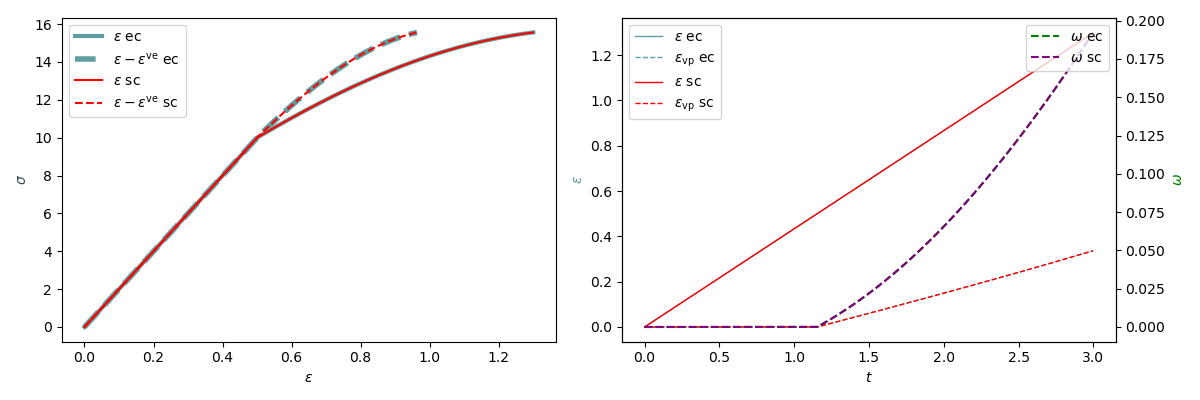

In [24]:
fig, (ax_sig, ax_eps) = plt.subplots(1, 2, figsize=(12, 4))

ax_sig.plot(eps_t_ec, sig_t_ec, color='cadetblue',lw=3,  label=r'$\varepsilon$ ec')
ax_sig.plot(eps_t_ec - eps_p_t_ec, sig_t_ec, lw=4, ls='dashed', color='cadetblue', label=r'$\varepsilon-\varepsilon^\mathrm{ve}$ ec')

ax_sig.plot(eps_t_sc, sig_t_sc, color='red', label=r'$\varepsilon$ sc')
ax_sig.plot(eps_t_sc - eps_p_t_sc, sig_t_sc, ls='dashed', color='red', label=r'$\varepsilon-\varepsilon^\mathrm{ve}$ sc')
ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.legend()

ax_eps.plot(t_t_ec, eps_t_ec, label=r'$\varepsilon$ ec', color='cadetblue', lw=1)
ax_eps.plot(t_t_ec, eps_p_t_ec, label=r'$\varepsilon_\mathrm{vp}$ ec', color='cadetblue', ls='dashed', lw=1)
ax_eps.plot(t_t_sc, eps_t_sc, label=r'$\varepsilon$ sc', color='red', lw=1)
ax_eps.plot(t_t_sc, eps_p_t_sc, label=r'$\varepsilon_\mathrm{vp}$ sc', color='red', ls='dashed', lw=1)
ax_eps.legend(loc='upper left')
ax_eps.set_ylabel(r'$\varepsilon$', color='cadetblue')
ax_eps.set_xlabel(r'$t$')

# Add a twin axis for damage (omega)
ax_damage = ax_eps.twinx()
ax_damage.plot(t_t_ec, omega_t_ec, label=r'$\omega$ ec', color='green', ls='--')
ax_damage.plot(t_t_sc, omega_t_sc, label=r'$\omega$ sc', color='purple', ls='--')
ax_damage.set_ylabel(r'$\omega$', color='green')
ax_damage.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Cyclic stress-driven loading

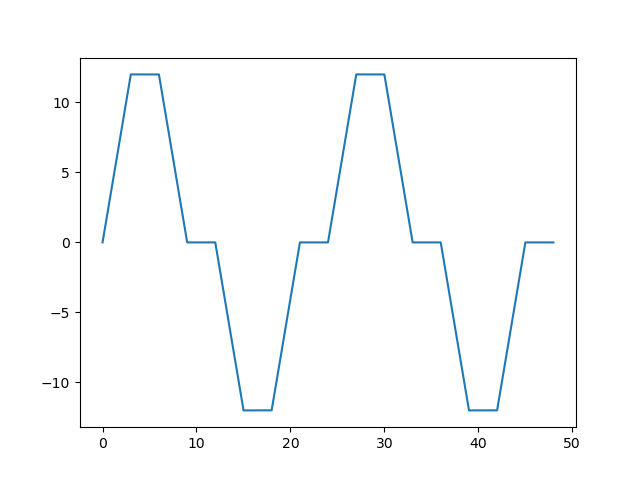

In [25]:
t_, sig_max_, t_1_, t_2_, t_3_ = sp.symbols('t sig_max t_1 t_2 t_3', real=True, positive=True)
eps_t_ = sp.Piecewise(
    (sig_max_ / t_1_ * t_, t_ < t_1_),
    (sig_max_, t_ < t_2_),
    (sig_max_ - sig_max_/(t_3_-t_2_)*(t_ - t_2_), t_ < t_3_),
    (0, True)
)
get_eps_t = sp.lambdify((t_, sig_max_, t_1_, t_2_, t_3_), eps_t_, 'numpy')
sig_max_val = 12 # np.max(sig_t_ec)
n_t_cyclic = 4 * n_t
final_time_cyclic = 4 * final_time 
t_t = np.linspace(0, final_time_cyclic, n_t_cyclic)
sig_n_t = get_eps_t(t_t, sig_max_val, 0.25*final_time_cyclic, 0.5*final_time_cyclic, 0.75*final_time_cyclic)

# Extend the loading history with 10 alternating sections
for i in range(1, 2):
    t_t = np.hstack((t_t, t_t[-1] + t_t[1:]))
    sig_n_t = np.hstack([sig_n_t, (-1)**i * sig_n_t[1:]])

for i in range(1, 2):
    t_t = np.hstack((t_t, t_t[-1] + t_t[1:]))
    sig_n_t = np.hstack([sig_n_t, sig_n_t[1:]])

fig, ax = plt.subplots(1, 1)
ax.plot(t_t, sig_n_t)

In [26]:
rd_sc = gsm.get_G_response(sig_n_t, t_t)

In [27]:
t_t_sc_cyclic = rd_sc.t_t
iter_t_sc_cyclic = rd_sc.iter_t
lam_t_sc_cyclic = rd_sc.lam_t
eps_t_sc_cyclic = rd_sc.eps_t[:, 0, 0]
sig_t_sc_cyclic = rd_sc.sig_t[:, 0]
eps_p_t_sc_cyclic = rd_sc.Eps_t.eps_p_a[:, 0, 0]
omega_t_sc_cyclic = rd_sc.Eps_t.omega_a[:, 0, 0]
sig_p_t_sc_cyclic = rd_sc.Sig_t.sig_p_a[:, 0, 0]
Y_t_sc_cyclic = rd_sc.Sig_t.Y_a[:, 0, 0]

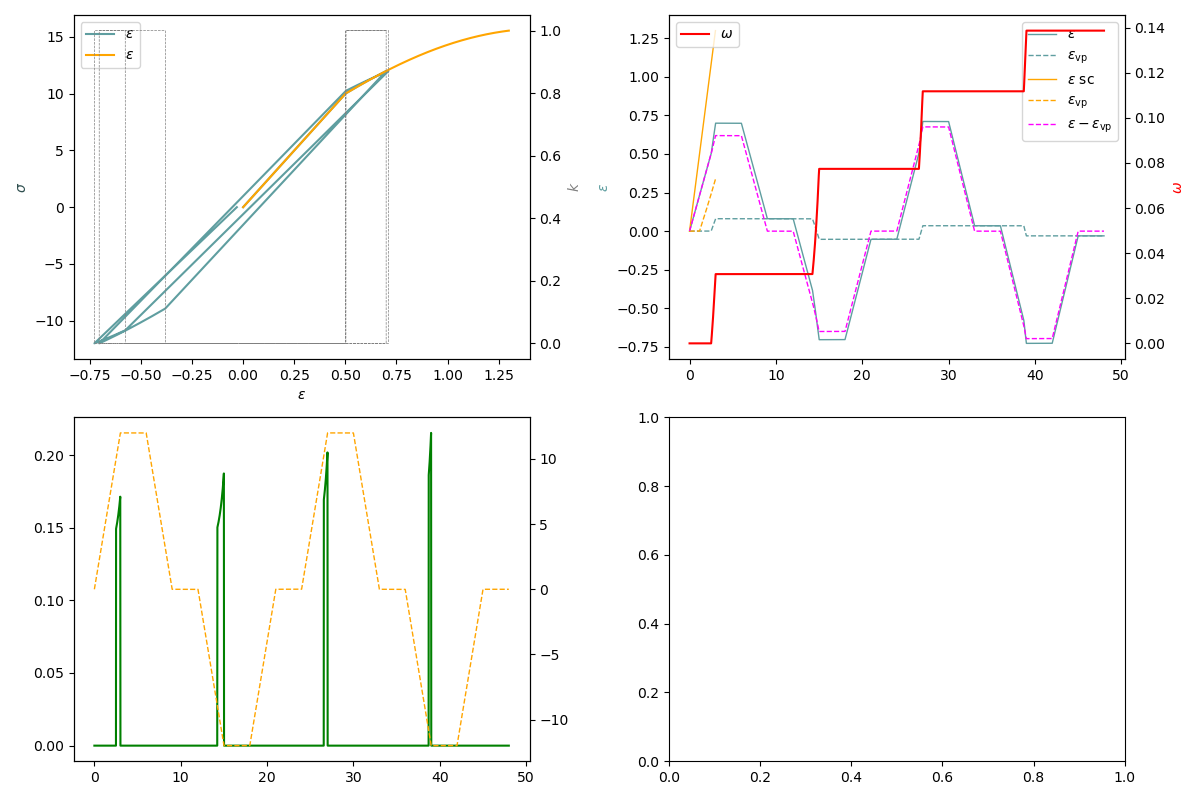

In [28]:
fig, ((ax_sig, ax_eps), (ax_lam, ax_z)) = plt.subplots(2, 2, figsize=(12, 8))

# First row: Stress-strain and damage plots
ax_iter = ax_sig.twinx()
ax_omega = ax_eps.twinx()
ax_sig_t = ax_lam.twinx()

# fig, (ax_sig, ax_eps) = plt.subplots(1, 2, figsize=(12, 4))

# Plot stress-strain and iterations-strain curves
# ax_iter = ax_sig.twinx()

ax_sig.plot(eps_t_sc_cyclic, sig_t_sc_cyclic, color='cadetblue', label=r'$\varepsilon$')
# ax_sig.plot(eps_t_sc_cyclic-eps_p_t_sc_cyclic, sig_t_sc_cyclic, ls='dashed', color='cadetblue', label=r'$\varepsilon-\varepsilon^\mathrm{ve}$')
ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')

ax_sig.plot(eps_t_sc, sig_t_sc, color='orange', label=r'$\varepsilon$')
# ax_sig.plot(eps_t_sc-eps_p_t_sc, sig_t_sc, ls='dashed', color='orange', label=r'$\varepsilon-\varepsilon^\mathrm{ve}$')
ax_sig.legend()

ax_iter.plot(eps_t_sc_cyclic, iter_t_sc_cyclic, ls='dashed', color='gray', lw=0.5)
ax_iter.set_ylabel(r'$k$', color='gray')

ax_eps.plot(t_t, eps_t_sc_cyclic, label=r'$\varepsilon$', color='cadetblue', lw=1)
ax_eps.plot(t_t, eps_p_t_sc_cyclic, label=r'$\varepsilon_\mathrm{vp}$', color='cadetblue', ls='dashed', lw=1)
ax_eps.plot(t_t_sc, eps_t_sc, label=r'$\varepsilon$ sc', color='orange', lw=1)
ax_eps.plot(t_t_sc, eps_p_t_sc, label=r'$\varepsilon_\mathrm{vp}$', color='orange', ls='dashed', lw=1)
ax_omega.plot(t_t, omega_t_sc_cyclic, label=r'$\omega$', color='red')
ax_omega.set_ylabel(r'$\omega$', color='red')
ax_omega.set_xlabel(r'$t$')
ax_omega.legend()

ax_eps.plot(t_t, eps_t_sc_cyclic-eps_p_t_sc_cyclic, label=r'$\varepsilon-\varepsilon_\mathrm{vp}$', color='magenta', ls='dashed', lw=1)

ax_lam.plot(t_t, lam_t_sc_cyclic[:, 0, 0], label=r'$\lambda$', color='green')
ax_sig_t.plot(t_t, sig_n_t, label=r'$\sigma$', color='orange', ls='dashed', lw=1)

ax_eps.legend()
ax_eps.set_ylabel(r'$\varepsilon$', color='cadetblue')

plt.tight_layout()
plt.show()

## Cyclic strain-driven loading

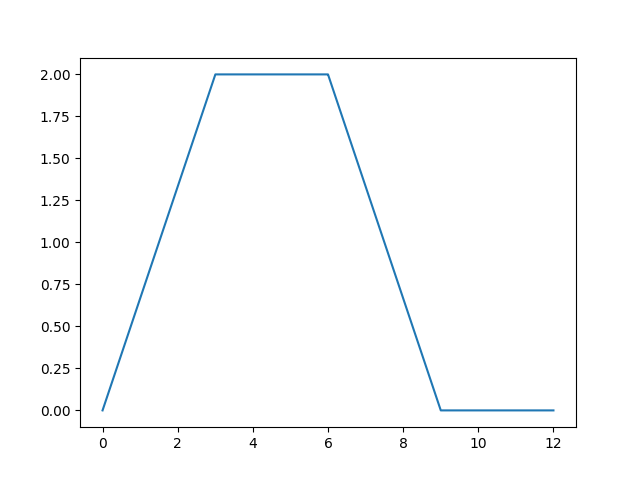

In [18]:
t_, sig_max_, t_1_, t_2_, t_3_ = sp.symbols('t sig_max t_1 t_2 t_3', real=True, positive=True)
eps_t_ = sp.Piecewise(
    (sig_max_ / t_1_ * t_, t_ < t_1_),
    (sig_max_, t_ < t_2_),
    (sig_max_ - sig_max_/(t_3_-t_2_)*(t_ - t_2_), t_ < t_3_),
    (0, True)
)
get_eps_t = sp.lambdify((t_, sig_max_, t_1_, t_2_, t_3_), eps_t_, 'numpy')
eps_max = 2
n_t_ec_cyclic = 4 * n_t
f_time = 4 * final_time
t_t = np.linspace(0, f_time, n_t_ec_cyclic)
eps_n_t = get_eps_t(t_t, eps_max, 0.25*f_time, 0.5*f_time, 0.75*f_time)
fig, ax = plt.subplots(1,1)
ax.plot(t_t, eps_n_t)

In [19]:
mparams = dict(E = 20, K = 5, S = 10, c = 1, r = 1, eps_0 = 0, f_c = 15, eta_vp=1)
response = gsm.get_response(eps_n_t, t_t, **mparams)
t_t, eps_ta, sig_ta, Eps_t, Sig_t, iter_t, lam_t, (d_t_t, d_eps_ta) = response
# Plot viscoplastic strain and damage along time
eps_t = eps_ta[:, 0]
sig_t = sig_ta[:, 0]
eps_p_t, omega_t, z_t = Eps_t[:, 0, :].T
sig_p_t, Y_t, Z_t = Sig_t[:, 0, :].T

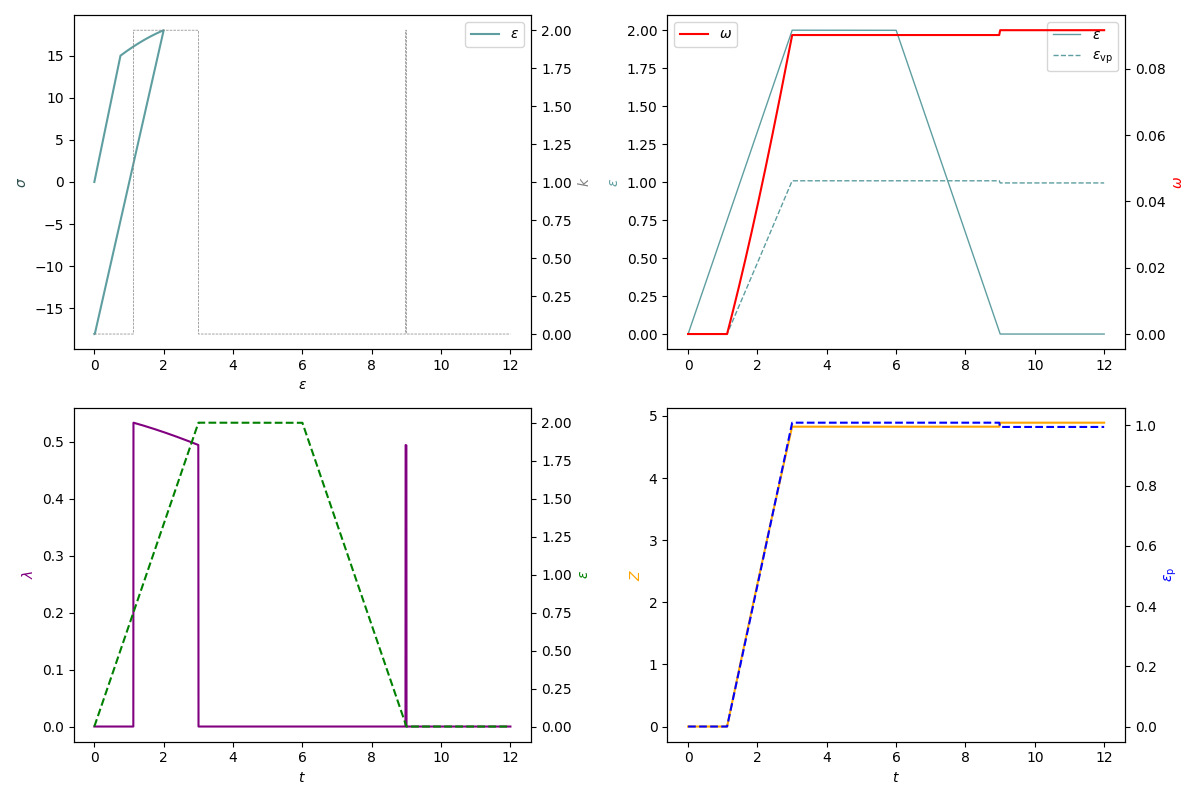

In [20]:
fig, ((ax_sig, ax_eps), (ax_lam, ax_z)) = plt.subplots(2, 2, figsize=(12, 8))

# First row: Stress-strain and damage plots
ax_iter = ax_sig.twinx()
ax_omega = ax_eps.twinx()

ax_sig.plot(eps_t, sig_t, color='cadetblue', label=r'$\varepsilon$')
# ax_sig.plot(eps_t-eps_p_t, Sig_t[:,:,0], ls='dashed', color='cadetblue', label=r'$\varepsilon-\varepsilon^\mathrm{ve}$')
ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.legend()

ax_iter.plot(t_t, iter_t, ls='dashed', color='gray', lw=0.5)
ax_iter.set_ylabel(r'$k$', color='gray')

ax_eps.plot(t_t, eps_t, label=r'$\varepsilon$', color='cadetblue', lw=1)
ax_eps.plot(t_t, eps_p_t, label=r'$\varepsilon_\mathrm{vp}$', color='cadetblue', ls='dashed', lw=1)
ax_eps.legend()
ax_eps.set_ylabel(r'$\varepsilon$', color='cadetblue')
ax_omega.plot(t_t, omega_t, label=r'$\omega$', color='red')
ax_omega.set_ylabel(r'$\omega$', color='red')
ax_omega.set_xlabel(r'$t$')
ax_omega.legend()

# Second row: Lagrange multiplier and plastic strain plots
ax_lam_eps_t = ax_lam.twinx()
ax_lam.plot(t_t, lam_t[:, 0, 0], label=r'$\lambda$', color='purple')
ax_lam.set_xlabel(r'$t$')
ax_lam.set_ylabel(r'$\lambda$', color='purple')
ax_lam_eps_t.plot(t_t, eps_t, label=r'$\varepsilon$', color='green', ls='dashed')
ax_lam_eps_t.set_ylabel(r'$\varepsilon$', color='green')

ax_z_eps_p = ax_z.twinx()
ax_z.plot(t_t, Z_t, label=r'$z$', color='orange')
ax_z.set_xlabel(r'$t$')
ax_z.set_ylabel(r'$Z$', color='orange')
ax_z_eps_p.plot(t_t, eps_p_t, label=r'$\varepsilon_\mathrm{p}$', color='blue', ls='dashed')
ax_z_eps_p.set_ylabel(r'$\varepsilon_\mathrm{p}$', color='blue')

plt.tight_layout()
plt.show()